## Experience on all mice to determine kappa coefficient. 

This experiment is about comparing the prediction made by the balanced random forest model, the SVM models and the expert's annotations

In [13]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

import sys
sys.path.append('../Library')
import breedManip as breedManip
import dataProcessing as dataProcessing
import breeds as breeds
import splitData as splitData

import pickle
import os

In [14]:
# use pickle to load the model already trained
with open('/home/magali.egger/workspace/TBproject/Travail_Bachelor/Data/rfc_kappa.pkl', 'rb') as f:
    rfc = pickle.load(f)

#### Prepare the data frame

In [15]:
with open('/home/magali.egger/workspace/TBproject/Travail_Bachelor/Data/df_simplify.pkl', 'rb') as f:
    df = pickle.load(f)

In [16]:
df = df[(df['day'] == 0) | (df['day'] == 1)]
df = df.drop(columns=['mouse'])
df = df.drop(columns=['breed'])

In [17]:
# split the features and the labels of the df
features = df.drop(columns=['state', 'rawState'])
svm = df['rawState']

with open('/home/magali.egger/workspace/TBproject/Travail_Bachelor/Data/scaler_class_all.pkl', 'rb') as f:
    scaler = pickle.load(f)
features = scaler.transform(features)


#### Prepare the different predictions

In [18]:
# compute the prediction
prediction = rfc.predict(features)
pred = np.argmax(prediction, axis=1)

#### Calculate the kappa coefficient of the random forest model vs the SVM model

In [23]:

kappa = metrics.cohen_kappa_score(svm, pred)
print(kappa)

0.707246297703118


[[4431822      23  295214]
 [ 509000    7665  101486]
 [ 749660     303 4551153]]
              precision    recall  f1-score   support

           n       0.78      0.94      0.85   4727059
           r       0.96      0.01      0.02    618151
           w       0.92      0.86      0.89   5301116

    accuracy                           0.84  10646326
   macro avg       0.89      0.60      0.59  10646326
weighted avg       0.86      0.84      0.82  10646326



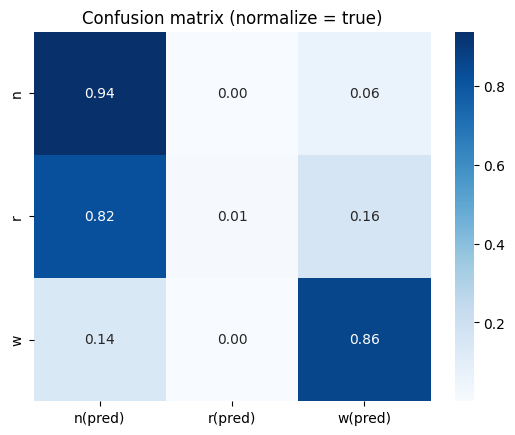

In [24]:
cm = np.array(confusion_matrix(svm, pred))
print(cm)

cm = np.array(confusion_matrix(svm, pred, normalize='true')) # normalize = 'true' or 'pred'
confusion = pd.DataFrame(cm, index=['n', 'r', 'w'], columns=['n(pred)', 'r(pred)', 'w(pred)'])

print(metrics.classification_report(svm, pred, target_names=['n','r','w'], zero_division=0))

sns.heatmap(confusion, annot=True, cmap="Blues", fmt='.2f')
plt.title(f'Confusion matrix (normalize = true)')
plt.show()